## Solution

### 1.1

We have 
$$
E_1(u) = \Vert u - v \Vert ² + \lambda \Vert \nabla u \Vert ² = \sum_{i=
1}^{3} \Vert (K_i \ast u - v_{i}) \Vert ² 
$$ 

With this minimization problem, we can found that the solution is:

$$
\hat{u} = \frac {\sum_{i} \overline{\hat{K_i(w)}} \hat{v_i}} {\sum_{i} \overline{|\hat{K_i(w)|}² } }
$$

This is the implementation in the function `resoud_quad_fourier` called by `minimisation_quadratique`. 

### 1.2

When the $\lambda$ is so small, the function does not do anything. In contrast, when the $\lambda$ is so large, the function makes the image so blurry.

When we change the value of $\lambda$, we variate the importance to the regularization term with respect to the data attachment term.

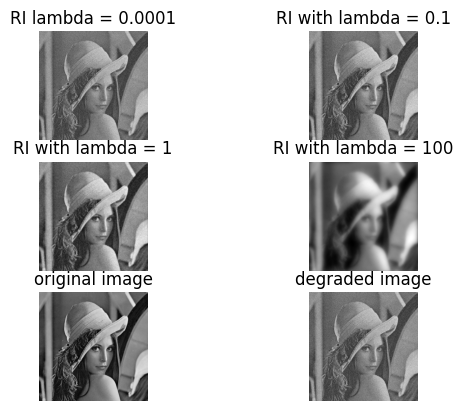

In [ ]:
im = imread('lena.tif')
imb = degrade_image(im,25)

#Restaurations
lambda1 = 0.0001
lambda2 = 0.1
lambda3 = 1
lambda4 = 100

restau1 = minimisation_quadratique(imb,lambda1)
restau2 = minimisation_quadratique(imb,lambda2)
restau3 = minimisation_quadratique(imb,lambda3)
restau4 = minimisation_quadratique(imb,lambda4)


#show restored images in 3 columns and 2 rows
#Hide axes


plt.subplot(3,2,1)
plt.imshow(restau1,cmap='gray')
plt.axis('off')
plt.title('RI lambda = 0.0001')
plt.subplot(3,2,2)
plt.imshow(restau2,cmap='gray')
plt.axis('off')
plt.title('RI with lambda = 0.1')
plt.subplot(3,2,3)
plt.imshow(restau3,cmap='gray')
plt.axis('off')
plt.title('RI with lambda = 1')
plt.subplot(3,2,4)
plt.imshow(restau4,cmap='gray')
plt.axis('off')
plt.title('RI with lambda = 100')
plt.subplot(3,2,5)
plt.imshow(im,cmap='gray')
plt.axis('off')
plt.title('original image')
plt.subplot(3,2,6)
plt.imshow(imb,cmap='gray')
plt.axis('off')
plt.title('degraded image')
plt.show()




### 1.3

We found that the $\lambda$ = 0.3308 is the $\lambda$ that respects the theorical data attachment norm

In [ ]:
im = imread('lena.tif')
imb = degrade_image(im,5)

goal = norm2(imb - im)

lmin = 0.001
lmax = 1

min_restauration = minimisation_quadratique(imb,lmin)
max_restauration = minimisation_quadratique(imb,lmax)

min_norm = norm2(imb - min_restauration)
max_norm = norm2(imb - max_restauration)

for i in range(100):
    l = (lmin + lmax)/2
    restauration = minimisation_quadratique(imb,l)
    norm = norm2(imb - restauration)
    if norm > goal:
        lmax = l
        max_norm = norm
        max_restauration = restauration
    else:
        lmin = l
        min_norm = norm
        min_restauration = restauration

print("lambda = ", l)

lambda =  0.330324850846221


### 1.4

We found that the best $\lambda$ is $\lambda$ = 0.1122 In any case less than lambda of the data attachment

In [ ]:
vk = np.arange(-1,0,0.05)

best_error = norm2(imb)+10
best_lambda = 0
for k in vk:
    lamb = 10**k
    restau = minimisation_quadratique(imb,lamb)
    erreur = norm2(im-restau)

    if erreur < best_error:
        best_error = erreur
        best_lambda = lamb
        
print("best lambda = ", best_lambda)

best lambda =  0.11220184543019636


### 2.1

It is observed that a gradient descent with a non-constant step performs poorly with total variation. Sometimes, the energy even increases after decreasing

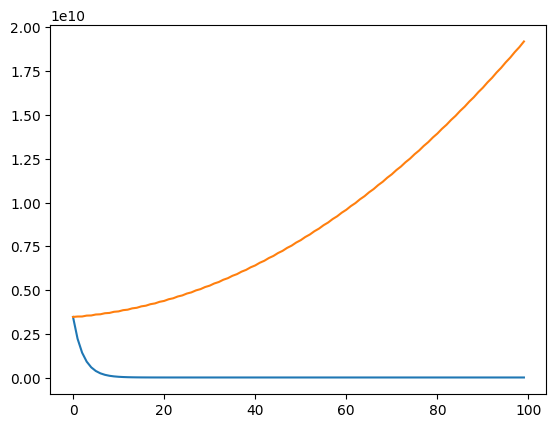

In [ ]:
im = imread('lena.tif')
imb = degrade_image(im,25)

(u,energ)=minimise_TV_gradient(imb,1,0.1,100)  #step = 0.1 
(u,energ2)=minimise_TV_gradient(imb,1,1,100) #step = 1

plt.plot(energ)
plt.plot(energ2)
plt.show()

### 2.2

The Chambolle's method and minimize_TV_gradient both minimize an energy corresponding to the non-periodic gradient. To obtain equivalent energies, it would be necessary to perform 1000 gradient descent steps with a step size of 0.01.



In [ ]:
u1,en1=minimise_TV_gradient(imb, 40, 0.1, 100)
e2grad = E2_nonperiodique(u1,imb,40)
print("E2 = ", e2grad)

u_chambolle = vartotale_Chambolle(imb,40, itmax=30)
e2chambolle = E2_nonperiodique(u_chambolle,imb,40)
print("E2 = ", e2chambolle)

print(e2chambolle / e2grad)

E2 =  264395118.145648
E2 =  203226196.25747216
0.7686457968014387


### 3

error_tv is smaller than error_quad, and as a result, the obtained image is significantly better in terms of quality. The edges are better preserved in the restauration_tv image.

best lambda =  1.1220184543019658


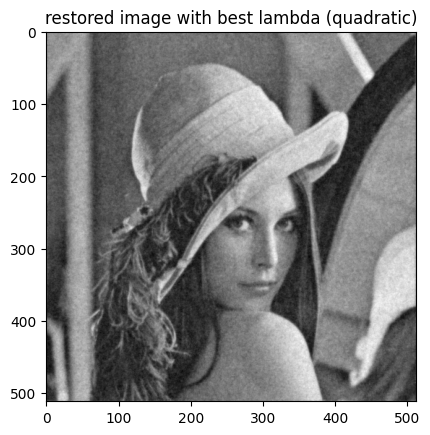

best lambda =  44.668359215096324


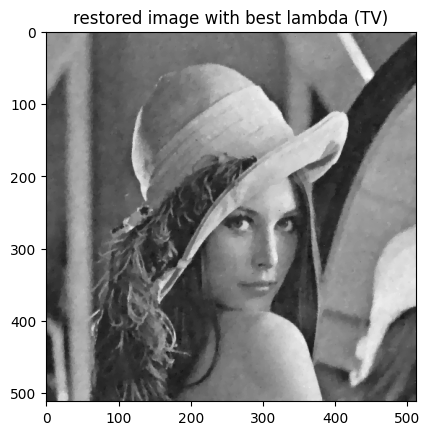

In [ ]:
im = imread('lena.tif')
imb = degrade_image(im,25)

vk = np.arange(-1,1,0.05)
best_error = norm2(imb)+10

for k in vk:
    lamb = 10**k
    restau = minimisation_quadratique(imb,lamb)
    erreur = norm2(im-restau)

    if erreur < best_error:
        best_error = erreur
        best_lambda = lamb

print("best lambda = ", best_lambda)

best_lambda_quad = best_lambda
restauration_quad = minimisation_quadratique(imb,best_lambda_quad)
error_quad = norm2(im - restauration_quad)

#show restored image
plt.imshow(restauration_quad,cmap='gray')
plt.title('restored image with best lambda (quadratic)')
plt.show()

#Total Variation
vk = np.arange(1.39,1.8,0.02)
best_error = norm2(imb)+10

for k in vk:
    lamb = 10**k
    restau = vartotale_Chambolle(imb,lamb, itmax=30)
    erreur = norm2(im-restau)

    if erreur < best_error:
        best_error = erreur
        best_lambda = lamb

print("best lambda = ", best_lambda)

best_lambda_tv = best_lambda
restauration_tv = vartotale_Chambolle(imb,best_lambda_tv)
error_tv = norm2(im - restauration_tv)

#show restored image
plt.imshow(restauration_tv,cmap='gray')
plt.title('restored image with best lambda (TV)')
plt.show()
